Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [ ]:
NAME = "Shiva Prasad Sarkar"
ID = "23101302"
SECTION = "21"

---

## Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

In [ ]:
P=Polynomial([1,2,3,4])

In [ ]:
print(P)

1.0 + 2.0·x + 3.0·x² + 4.0·x³


In [ ]:
print(P.deriv())
print(P.integ())

2.0 + 6.0·x + 12.0·x²
0.0 + 1.0·x + 1.0·x² + 1.0·x³ + 1.0·x⁴


## Part 1: Polynomial Interpolation Using Newton's Divided Difference Form
---


### Newton's Divided Difference Form

Newton form of a $n$ degree polynomial:

$$p_n(x) = \sum_{k=0}^{n} a_kn_k(x),$$
where the basis is:
$$n_k(x) = \prod_{j=0}^{k-1}(x-x_j),$$
$$ n_0(x)=1,$$

and the coefficients are: $$a_k = f[x_0, x_1, ..., x_k],$$

where the notation $f[x_0, x_1,\dots,x_k]$ denotes the divided difference.

By expanding the Newton form, we get:

$$p(x) = f [x_0] + (x-x_0) f[x_0,x_1] + (x-x_0) (x-x_1) f[x_0,x_1,x_2] + \dots + (x-x_0) (x-x_1) \dots (x-x_{k-1}) f[x_0, x_1, \dots, x_k]$$

## Task 1 - 2+2 Marks
1. Complete the `calc_div_diff(x,y)` function which takes input `x` and `y`, and calculates all the divided differences. You may use the lambda function `difference()` inside the `calc_div_diff(x,y)` function to calculate the divided differences.

2. Complete the `__call__()` function which takes an input `x`, and calculates `y` using all the difference coefficients. `x` can be a single value or a numpy. In this case, it is a numpy array.

`res` variable must contain all results (corresponding y for x).

In [ ]:
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)

def calc_div_diff(x,y):
    assert(len(x)==len(y))
    n = len(x)
    b = np.zeros((n,n))
    b[:,0] = y
    for c in range(1,n):
      for r in range(n-c):
        b[r][c] = difference(b[r+1][c-1],b[r][c-1],x[r+c],x[r])
    return b[0]

class Newtons_Divided_Differences:

    def __init__(self, differences, data_x):
        self.differences = differences
        self.data_x = data_x

    def n(self, k, x):
        result = 1
        for i in range(k):
            result *= (x - self.data_x[i])
        return result

    def __call__(self, x):
        res = np.zeros(len(x))
        for i in range(len(x)):
          for j in range(len(self.data_x)):
              res[i] += self.differences[j]*self.n(j,x[i])
        return res


[ 1.91596033e+04  1.31559256e+04  8.56170186e+03  5.12699700e+03
  2.63391150e+03  8.93915843e+02 -2.54706325e+02 -9.49306214e+02
 -1.30520928e+03 -1.41794588e+03 -1.36537320e+03 -1.20968853e+03
 -9.99333725e+02 -7.70791092e+02 -5.50270437e+02 -3.55287482e+02
 -1.96133541e+02 -7.72364950e+01  1.58695188e+00  4.39877195e+01
  5.60495129e+01  4.53626937e+01  2.02068613e+01 -1.11578542e+01
 -4.10907896e+01 -6.30620348e+01 -7.20350085e+01 -6.47403240e+01
 -3.98409435e+01  2.01137807e+00  5.82283589e+01  1.24446168e+02
  1.94795113e+02  2.62278038e+02  3.19257433e+02  3.58051252e+02
  3.71637446e+02  3.54467202e+02  3.03386893e+02  2.18668743e+02
  1.05150197e+02 -2.65179947e+01 -1.58514983e+02 -2.64384316e+02
 -3.07459722e+02 -2.39182188e+02  2.69168134e+00  4.95990006e+02
  1.33613469e+03  2.63825919e+03]


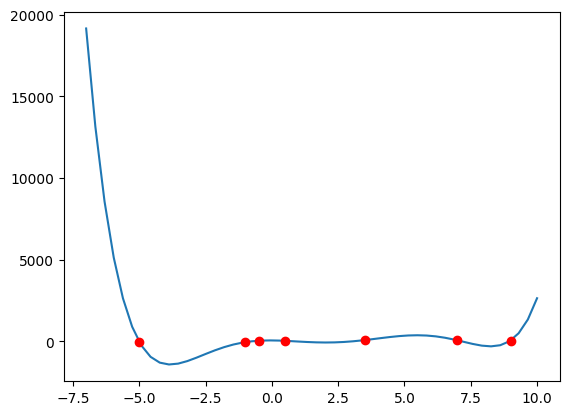

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-30., -50., 36., 31., 75., 60., 46.])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)

test_x = np.linspace(-7, 10, 50, endpoint=True)
test_y = p(test_x)
print(test_y)
#generating 50 points from -3 to 4 in order to create a smooth line
plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()

### Plotting the polynomial
* `data_x` and `data_y` are the coordinates of the given nodes.

* `differences` is a list which contains the divided differences as each of its elements: $f[x_0], f[x_0,x_1], f[x_0,x_1,x_2], \dots$

* `obj` is an object of type `Newtons_Divided_Differences`. Creating the object runs the constructor of the class where the `difference` are stored in `self.differences`.

* `X` contains $x_i$ values through which we want to plot our polynomial.

* Calling the object using `obj(X)` executes the `__call__()` function of the class, which returns a numpy array containing the corresponding $y_i$ values, and storing them in variable `F`.

* Using `plt.plot(X,F)`, we plot the $(x_i, y_i)$ pairs of the polynomial.

# Daily Evaluation - 4 marks

In [ ]:
#task 1
import numpy as np
import matplotlib.pyplot as plt
data_x = np.array([-1.5, 0.5, 1.67])
data_y = np.array([3.75, 1.22, 2.9])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
test_x = [0.25]
test_y = p(test_x)
print(test_y[0])

1.1634920731214105


In [ ]:
#task 2
import numpy as np
import matplotlib.pyplot as plt
import math
k = lambda x: math.sin(x)
data_x = np.array([-math.pi/2,0,math.pi/2])
data_y = np.array([k(-math.pi/2),k(0),k(math.pi/2)])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
test_x = [math.pi/4]
test_y = p(test_x)
print('a) Using Newtons Polynomial Interpolation : ',test_y[0])
print()
actual = k(math.pi/4)
print("b) Trancation error : ", abs(actual - test_y[0]))


a) Using Newtons Polynomial Interpolation :  0.5

b) Trancation error :  0.20710678118654746
